In [2]:
import os
import json

import numpy as np
from iqcc_cloud_client import IQCC_Cloud
from quam import quam_dataclass
from quam.components.macro import QubitMacro

from typing import Any
import warnings

from qm import QuantumMachinesManager, SimulationConfig
from qm.qua import *
from qm_saas import QoPVersion, QmSaas
from quam_libs.components import *
from qiskit_qm_provider import (
    FluxTunableTransmonBackend,
    ParameterTable,
    Parameter as QuaParameter,
)
from qiskit_qm_provider.backend.backend_utils import add_basic_macros_to_machine
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector, QuantumRegister

from quam_libs.components.quam_root import QuAM as IQCC_Quam
import warnings
import logging

# Silence DeprecationWarnings from qiskit.pulse
warnings.filterwarnings("ignore", category=DeprecationWarning, module=r"qiskit\.pulse")
# Filter all DeprecationWarnings
logging.getLogger("qiskit").setLevel(logging.ERROR)

In [3]:
from iqcc_cloud_client import IQCC_Cloud
import json
import os
from pathlib import Path

# Set your quantum computer backend
path = Path.home() / "iqcc_token.json"
with open(path, "r") as f:
    iqcc_config = json.load(f)

quantum_computer_backend = "gilboa"  # for example qc_qwfix
iqcc = IQCC_Cloud(
    quantum_computer_backend=quantum_computer_backend,
    api_token=iqcc_config[quantum_computer_backend],
)
# Get the latest state and wiring files
latest_wiring = iqcc.state.get_latest("wiring")
latest_state = iqcc.state.get_latest("state")

# Get the state folder path from environment variable
quam_state_folder_path = os.environ["QUAM_STATE_PATH"]

# Save the files
with open(os.path.join(quam_state_folder_path, "wiring.json"), "w") as f:
    json.dump(latest_wiring.data, f, indent=4)

with open(os.path.join(quam_state_folder_path, "state.json"), "w") as f:
    json.dump(latest_state.data, f, indent=4)
file_path = "/pulse_level/qua/quam_state"
machine = IQCC_Quam.load()

In [4]:
list(machine.active_qubits[0].macros.keys())

['x', 'rz', 'sx', 'delay', 'reset', 'measure']

In [5]:
if not machine.active_qubits[0].macros:
    add_basic_macros_to_machine(machine)

In [6]:
backend = FluxTunableTransmonBackend(machine)
print(backend.target)

Target: Transmon based QuAM
Number of qubits: 4
Instructions:
	x
		(0,)
		(1,)
		(2,)
		(3,)
	rz
		(0,)
		(1,)
		(2,)
		(3,)
	sx
		(0,)
		(1,)
		(2,)
		(3,)
	delay
		(0,)
		(1,)
		(2,)
		(3,)
	reset
		(0,)
		(1,)
		(2,)
		(3,)
	measure
		(0,)
		(1,)
		(2,)
		(3,)
	cz
		(3, 1)
	if_else
	while_loop
	for_loop
	switch_case
	box



/Users/arthurostrauss/Library/CloudStorage/OneDrive-QMMachinesLTD/GitHub/qiskit-qm-provider/qiskit_qm_provider/backend/flux_tunable_transmon_backend.py:58: UserWarning: qiskit.pulse is not available, channel mapping will not be set.
  warnings.warn("qiskit.pulse is not available, channel mapping will not be set.")


In [7]:
using_vpn = False
if using_vpn:
    machine.network["cloud"] = False
    machine.network["port"] = 9510
else:
    backend.qmm = iqcc

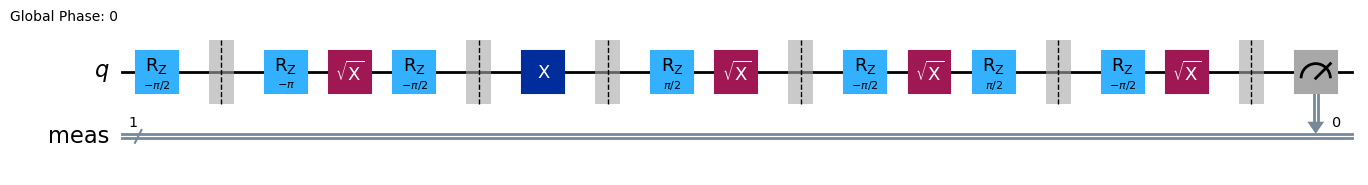

In [8]:
from qiskit_experiments.library.randomized_benchmarking import StandardRB
from qiskit_qm_provider.primitives.qm_sampler import QMSamplerV2, QMSamplerOptions

sampler = QMSamplerV2(
    backend,
    options=QMSamplerOptions(input_type="INPUT_STREAM", run_options={"timeout": 600}),
)
exp = StandardRB([0], [5, 50, 150, 200, 300, 400], backend=backend, num_samples=5)
exp._transpiled_circuits()[0].draw("mpl")

In [9]:
exp_data = exp.run(sampler=sampler)

/Users/arthurostrauss/OneDrive - National University of Singapore/Coding_projects/Quantum_Optimal_Control/.venv/lib/python3.13/site-packages/quam/components/channels.py:647: UserWarning: The 'thread' element argument is deprecated from qm.qua >= 1.2.2. Use 'core' instead.
  warnings.warn(


Output()

[13:33:58] QUA program submitted to gilboa (id = 7c429a12-25ee-4702-88f6-36f65bcccaea)             computers.py:426

[13:34:02] Execution started                                                                       computers.py:446

[13:35:42] Execution finished                                                                      computers.py:460

QUA program has error:

Traceback (most recent call last):
  File "/app/.venv/lib/python3.11/site-packages/grpclib/client.py", line 369, in recv_initial_metadata
    headers = await self._stream.recv_headers()
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/app/.venv/lib/python3.11/site-packages/grpclib/protocol.py", line 342, in recv_headers
    await self.headers_received.wait()
  File "/usr/local/lib/python3.11/asyncio/locks.py", line 213, in wait
    await fut
asyncio.exceptions.CancelledError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/app/temp.py", line 52988, in <module>
    qm_job = qm.execute(prog)
             ^^^^^^^^^^^^^^^^
  File "/app/.venv/lib/python3.11/site-packages/qm/api/v2/qm_api_old.py", line 173, in execute
    new_job_api = self.add_to_queue(program, compiler_options=compiler_options)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/app/.venv/lib/python3.11/site-packages/qm/api/v2/qm_api.py", line 242, in add_to_queue
    return self._add_program(program)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/app/.venv/lib/python3.11/site-packages/qm/api/v2/qm_api.py", line 195, in _add_program
    response = self._run(self._stub.add_to_queue(request, timeout=self._timeout))
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/app/.venv/lib/python3.11/site-packages/qm/api/base_api.py", line 76, in wrapped
    raise e
  File "/app/.venv/lib/python3.11/site-packages/qm/api/base_api.py", line 53, in wrapped
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/app/.venv/lib/python3.11/site-packages/qm/api/v2/base_api_v2.py", line 22, in _run
    response = run_async(coroutine)
               ^^^^^^^^^^^^^^^^^^^^
  File "/app/.venv/lib/python3.11/site-packages/qm/utils/async_utils.py", line 38, in run_async
    return create_future(coroutine).result()  # type: ignore
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/concurrent/futures/_base.py", line 456, in result
    return self.__get_result()
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/concurrent/futures/_base.py", line 401, in __get_result
    raise self._exception
  File "/app/.venv/lib/python3.11/site-packages/qm/grpc/v2/__init__.py", line 1998, in add_to_queue
    return await self._unary_unary(
           ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/app/.venv/lib/python3.11/site-packages/betterproto/grpc/grpclib_client.py", line 85, in _unary_unary
    response = await stream.recv_message()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/app/.venv/lib/python3.11/site-packages/grpclib/client.py", line 426, in recv_message
    await self.recv_initial_metadata()
  File "/app/.venv/lib/python3.11/site-packages/grpclib/client.py", line 368, in recv_initial_metadata
    with self._wrapper:
  File "/app/.venv/lib/python3.11/site-packages/grpclib/utils.py", line 70, in __exit__
    raise self._error
grpclib.exceptions.StreamTerminatedError: Stream reset by remote party, error_code: 8

Adding data from job failed [Job ID: pending]
jobs and analysis raised exceptions [Experiment ID: f28e768b-29c5-45fe-9768-aadc2cc7c0cf]:Traceback (most recent call last):

  File "/Users/arthurostrauss/.local/share/uv/python/cpython-3.13.5-macos-aarch64-none/lib/python3.13/concurrent/futures/thread.py", line 59, in run
    result = self.fn(*self.args, **self.kwargs)

  File "/Users/arthurostrauss/OneDrive - National University of Singapore/Coding_projects/Quantum_Optimal_Control/.venv/lib/python3.13/site-packages/qiskit_experiments/framework/experiment_data.py", line 940, in _add_job_data
    raise ex

  File "/Users/arthurostrauss/OneDrive - National University of Singapore/Coding_projects/Quantum_Optimal_Control/.venv/lib/python3.13/site-packages/qiskit_experiments/framework/experiment_data.py", line 920, in _add_job_data
    job_result = job.result()

  File "/Users/arthurostrauss/Library/CloudStorage/OneDrive-QMMachinesLTD/GitHub/qiskit-qm-provider/qiskit_qm_provider/job/qm_sampler

In [12]:
exp_data.jobs()[0].qm_job

{'result': {'meas_0': [[0],
   [1],
   [1],
   [0],
   [0],
   [0],
   [1],
   [1],
   [1],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [1],
   [0],
   [0],
   [0],
   [1],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [1],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [1],
   [1],
   [1],
   [0],
   [1],
   [0],
   [1],
   [0],
   [0],
   [0],
   [0],
   [0],
   [1],
   [0],
   [0],
   [1],
   [1],
   [0],
   [1],
   [1],
   [1],
   [0],
   [1],
   [1],
   [0],
   [0],
   [1],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [1],
   [0],
   [0],
   [0],
   [0],
   [1],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [1],
   [0],
   [0],
   [0],
   [0],
   [1],
   [0],
   [0],
   [0],
   [0],
   [0],
   [0],
   [1],
   [

In [9]:
job = backend.qm.get_job(exp_data.jobs()[0].job_id())

AttributeError: 'IQCC_Cloud' object has no attribute 'get_job'

In [30]:
job.result_handles.meas_0.fetch_all()["value"]

array([1, 1, 0, ..., 0, 0, 0])

In [9]:
exp_data.block_for_results()

ExperimentData(StandardRB, c99f9bda-42a5-4d95-9ca1-50b98de969dd, job_ids=['pending'], metadata=<4 items>, figure_names=['StandardRB_Q0_c99f9bda.svg'])

In [11]:
exp_data.jobs()[0].result()

PrimitiveResult([BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>), BitArray(<shape=(), num_shots=1024, num_bits=1>)], metadata={})

In [9]:
backend.qm

In [24]:
from qiskit_experiments.library.characterization import T1
import numpy as np

delays = np.linspace(2e-8, 1e-4, 20)
t1_exp = T1([0], delays, backend)
print(delays)

[2.00000000e-08 5.28210526e-06 1.05442105e-05 1.58063158e-05
 2.10684211e-05 2.63305263e-05 3.15926316e-05 3.68547368e-05
 4.21168421e-05 4.73789474e-05 5.26410526e-05 5.79031579e-05
 6.31652632e-05 6.84273684e-05 7.36894737e-05 7.89515789e-05
 8.42136842e-05 8.94757895e-05 9.47378947e-05 1.00000000e-04]


In [25]:
backend.dt

1e-09

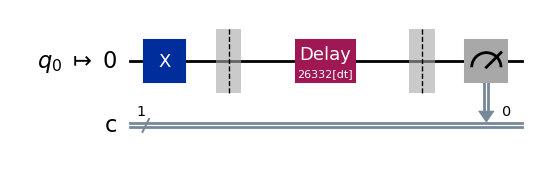

In [32]:
t1_exp._transpiled_circuits()[5].draw("mpl")

In [27]:
from qiskit_qm_provider.job.qua_programs import sampler_program
from qiskit.primitives.containers.sampler_pub import SamplerPub
from qm import generate_qua_script

print(
    generate_qua_script(
        sampler_program(
            backend, [SamplerPub.coerce(qc, shots=100) for qc in t1_exp._transpiled_circuits()]
        )
    )
)


# Single QUA script generated at 2025-06-06 18:01:12.849012
# QUA library version: 1.2.3a1

from qm import CompilerOptionArguments
from qm.qua import *

with program() as prog:
    v1 = declare(int, )
    v2 = declare(int, value=0)
    a1 = declare(bool, value=[False])
    v3 = declare(bool, )
    v4 = declare(fixed, )
    v5 = declare(fixed, )
    a2 = declare(bool, value=[False])
    v6 = declare(bool, )
    v7 = declare(fixed, )
    v8 = declare(fixed, )
    a3 = declare(bool, value=[False])
    v9 = declare(bool, )
    v10 = declare(fixed, )
    v11 = declare(fixed, )
    a4 = declare(bool, value=[False])
    v12 = declare(bool, )
    v13 = declare(fixed, )
    v14 = declare(fixed, )
    a5 = declare(bool, value=[False])
    v15 = declare(bool, )
    v16 = declare(fixed, )
    v17 = declare(fixed, )
    a6 = declare(bool, value=[False])
    v18 = declare(bool, )
    v19 = declare(fixed, )
    v20 = declare(fixed, )
    a7 = declare(bool, value=[False])
    v21 = declare(bool, )
  

In [28]:
backend.qm

In [29]:
exp_data = t1_exp.run(sampler=sampler)

/Users/arthurostrauss/anaconda3/envs/rl_qoc/lib/python3.11/site-packages/quam/components/channels.py:647: UserWarning: The 'thread' element argument is deprecated from qm.qua >= 1.2.2. Use 'core' instead.
  warnings.warn(


Output()

[18:01:18] QUA program submitted to gilboa (id = 7dfea37c-aabb-4032-b248-88825ecc935b)             ]8;id=181340;file:///Users/arthurostrauss/anaconda3/envs/rl_qoc/lib/python3.11/site-packages/iqcc_cloud_client/computers.py\computers.py]8;;\:]8;id=333204;file:///Users/arthurostrauss/anaconda3/envs/rl_qoc/lib/python3.11/site-packages/iqcc_cloud_client/computers.py#442\442]8;;\

[18:01:19] Execution started                                                                       ]8;id=468456;file:///Users/arthurostrauss/anaconda3/envs/rl_qoc/lib/python3.11/site-packages/iqcc_cloud_client/computers.py\computers.py]8;;\:]8;id=434233;file:///Users/arthurostrauss/anaconda3/envs/rl_qoc/lib/python3.11/site-packages/iqcc_cloud_client/computers.py#462\462]8;;\

[18:01:51] Execution finished                                                                      ]8;id=723762;file:///Users/arthurostrauss/anaconda3/envs/rl_qoc/lib/python3.11/site-packages/iqcc_cloud_client/computers.py\computers.py]8;;\:]8;id=473574;file:///Users/arthurostrauss/anaconda3/envs/rl_qoc/lib/python3.11/site-packages/iqcc_cloud_client/computers.py#476\476]8;;\

QUA program successfully executed

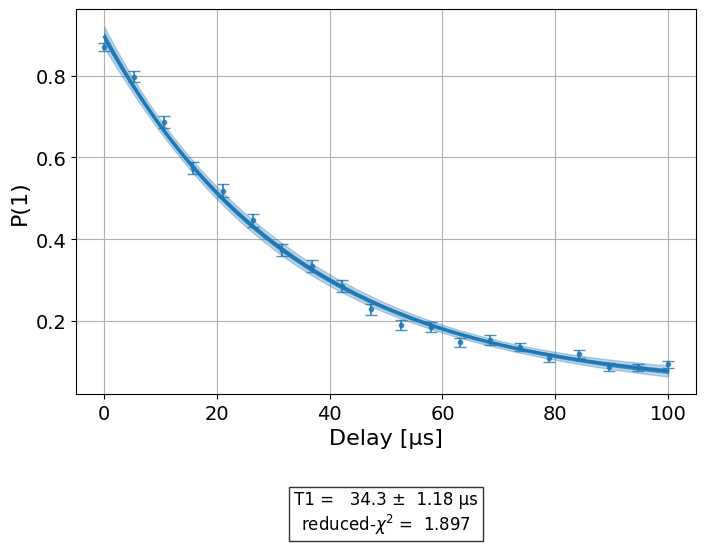

In [30]:
exp_data.figure(0)

In [23]:
machine.active_qubits[0].T1

2.4429276140337633e-05

In [ ]:
from qm.qua import *

q = machine.active_qubits
from quam.examples.superconducting_qubits.operations import Rx, x, y, cz, measure

op = OperationsRegistry()
with program() as prog:
    n = declare(int)
    with for_(n, 0, n < 1000, n + 1):
        cz(q[0] @ q[1])
        x(q[0])
        y(q[1])
        my_var = measure(q[0])
        my_var2 = measure(q[1])


@quam_dataclass
class MultiplexedMeasureMacro(QubitMacro):

    def apply(self, other_qubits: List[Qubits]) -> Any:
        measure(q[0])
        measure(q[1])

In [10]:
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler import Layout

qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0, 1)
qc.cx(2, 3)

# Partial layout: fix qubit 0 and 1 to physical qubit 3 and 1
partial_layout = Layout({qc.qubits[0]: 3, qc.qubits[1]: 1})
print(partial_layout)
transpiled_circuit = transpile(qc, backend, initial_layout=partial_layout)

Layout({
0: <Qubit register=(4, "q"), index=0>,
1: <Qubit register=(4, "q"), index=1>,
2: <Qubit register=(4, "q"), index=2>,
3: <Qubit register=(4, "q"), index=3>
})


TranspilerError: 'The circuit has an invalid layout as two qubits need to interact in disconnected components of the coupling map. The physical qubit 3 needs to interact with the qubit 2 and they belong to different components'